## Model to predict whether a person is leading a 'healthy' lifestyle or not.

### Overview: 

The dataset contains various factors that contribute to a person's lifestyle. The task is to build a model that uses these factors to predict whether a person is leading a 'healthy' lifestyle or not. 

### Dataset:

The dataset contains two files: train.csv and test.csv
1. train.csv - contains the training set observations. 25,920 rows, which have the target variable values as well for training the model.
2. test.csv - contains the testing set observations. 6,480 rows, with the target column missing. We have to use the trained model to predict the target column.

## Importing necessary libraries for EDA of Training data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## EDA of the Training Data

### 1. Getting basic information about the dataset by converting it into a pandas dataframe

In [2]:
train = pd.read_csv('Train_Data.csv')
test = pd.read_csv('Test_Data.csv')

In [3]:
train.head()

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy
0,2408,44,2668,DX6,49,20.500470,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,25063,39,10363,DX3 DX4,20,26.076580,NO,URBAN,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,26798,29,132,DX6,1,21.420866,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,31907,27,10499,DX1,30,25.203247,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,26412,9,7963,DX6,40,19.355846,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [4]:
test.head()

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year
0,28534,2,3306,DX6,38,18.879331,YES,URBAN,Stable,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,7970,5,5573,DX1,46,21.231991,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,22039,37,9305,DX4,11,17.867876,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,12332,44,8274,DX5,10,26.886096,NO,RURAL,Stable,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
4,4116,37,4558,DX3 DX4,3,23.362746,NO,RURAL,Stable,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25920 entries, 0 to 25919
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID1                        25920 non-null  int64  
 1   Specific ailments          25920 non-null  int64  
 2   ID2                        25920 non-null  int64  
 3   Food preference            25910 non-null  object 
 4   Age                        25920 non-null  int64  
 5   BMI                        25920 non-null  float64
 6   Smoker?                    25920 non-null  object 
 7   Living in?                 25920 non-null  object 
 8   Any heriditary condition?  25920 non-null  object 
 9   Follow Diet                24947 non-null  float64
 10  Physical activity          24947 non-null  float64
 11  Regular sleeping hours     24947 non-null  float64
 12  Alcohol consumption        24947 non-null  float64
 13  Social interaction         24947 non-null  flo

### 2. Finding out unique values and null values

In [37]:
print('Feature','  :  ','Unique_Values','  :  ','No. of Unique Values')
print('****************************************************************\n')
for column in train:
    print(column,' : ',train[column].unique(),' : ', train[column].nunique())
    print('\n-----------------------------------------------------------------\n')

Feature   :   Unique_Values   :   No. of Unique Values
****************************************************************

Specific ailments  :  [44 39 29 27  9 13 21  7 18 20 16 49 51 15  4  5 33 10 41 38 14 12 43 28
  6 34  1 17  2 48 19 25 11 36 37 52 42  8 24 31 30 26 50 22 40 45 47 35
  3 32 46 23]  :  52

-----------------------------------------------------------------

Age  :  [49 20  1 30 40 64 26  4 12 42 65  3 63 32 10 48 47  9 11  7 24 23 25 62
 13  8 57 52 54 56 22 44 29 60 43 58  5 27 15 51 37 46 19 17 16  0  6 50
 33 41 28 21  2 18 59 34 53 39 66 55 61 36 45 14 31 35 38]  :  67

-----------------------------------------------------------------

BMI  :  [20.50046954 26.07657952 21.42086578 ... 20.13510775 23.80772721
 21.90983244]  :  10397

-----------------------------------------------------------------

Living in?  :  [0 1]  :  2

-----------------------------------------------------------------

Follow Diet  :  [1. 0.]  :  2

-------------------------------------------

In [7]:
train = train.drop(columns = ['ID1', 'ID2', 'Any heriditary condition?'])
train.head()

,Specific ailments,Food preference,Age,BMI,Smoker?,Living in?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy
0,44,DX6,49,20.500470,NO,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,39,DX3 DX4,20,26.076580,NO,URBAN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,29,DX6,1,21.420866,NO,URBAN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,27,DX1,30,25.203247,NO,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,9,DX6,40,19.355846,YES,RURAL,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [8]:
train.isnull().sum()

Specific ailments             0
Food preference              10
Age                           0
BMI                           0
Smoker?                       0
Living in?                    0
Follow Diet                 973
Physical activity           973
Regular sleeping hours      973
Alcohol consumption         973
Social interaction          973
Taking supplements          973
Mental health management    973
Illness count last year     973
Healthy                       0
dtype: int64

### 3. Cleaning the data and feature engineering 

#### 3.a Dropping null values

In [9]:
train = train.dropna()
train.isnull().sum()


Specific ailments           0
Food preference             0
Age                         0
BMI                         0
Smoker?                     0
Living in?                  0
Follow Diet                 0
Physical activity           0
Regular sleeping hours      0
Alcohol consumption         0
Social interaction          0
Taking supplements          0
Mental health management    0
Illness count last year     0
Healthy                     0
dtype: int64

#### 3.b Encoding the 'Food Preference' column 

In [10]:
train["DX1"] = train["Food preference"].str.contains("DX1") 
train["DX2"] = train["Food preference"].str.contains("DX2") 
train["DX3"] = train["Food preference"].str.contains("DX3") 
train["DX4"] = train["Food preference"].str.contains("DX4") 
train["DX5"] = train["Food preference"].str.contains("DX5") 
train["DX6"] = train["Food preference"].str.contains("DX6") 

In [11]:
train['DX1'] = train['DX1'].map({False: 0, True: 1})
train['DX2'] = train['DX2'].map({False: 0, True: 1})
train['DX3'] = train['DX3'].map({False: 0, True: 1})
train['DX4'] = train['DX4'].map({False: 0, True: 1})
train['DX5'] = train['DX5'].map({False: 0, True: 1})
train['DX6'] = train['DX6'].map({False: 0, True: 1})

In [55]:
train.drop(['Food preference'],axis = 1, inplace = True)
train

,Specific ailments,Age,BMI,Smoker?,Living in?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy,DX1,DX2,DX3,DX4,DX5,DX6
0,44,49,20.500470,NO,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,1
1,39,20,26.076580,NO,URBAN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,1,1,0,0
2,29,1,21.420866,NO,URBAN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,1
3,27,30,25.203247,NO,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0,0,0,0
4,9,40,19.355846,YES,RURAL,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25915,12,58,25.515286,YES,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,1
25916,39,16,27.094959,NO,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,1
25917,44,8,28.602921,NO,RURAL,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1,1,0,0,0,0,0
25918,52,52,21.909832,NO,RURAL,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1,1,0,0,0,0,0


#### 3.c Encoding 'Living in?' column

In [12]:
train['Living in?'] = train['Living in?'].map({'RURAL':0, 'URBAN': 1})


In [13]:
train

,Specific ailments,Food preference,Age,BMI,Smoker?,Living in?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,...,Taking supplements,Mental health management,Illness count last year,Healthy,DX1,DX2,DX3,DX4,DX5,DX6
0,44,DX6,49,20.500470,NO,0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1,0,0,0,0,0,1
1,39,DX3 DX4,20,26.076580,NO,1,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1,0,0,1,1,0,0
2,29,DX6,1,21.420866,NO,1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0,0,0,0,0,0,1
3,27,DX1,30,25.203247,NO,0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1,1,0,0,0,0,0
4,9,DX6,40,19.355846,YES,0,1.0,0.0,0.0,0.0,...,0.0,0.0,2.0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25915,12,DX6,58,25.515286,YES,0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1,0,0,0,0,0,1
25916,39,DX6,16,27.094959,NO,0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0,0,0,0,0,0,1
25917,44,DX1,8,28.602921,NO,0,1.0,1.0,0.0,0.0,...,0.0,0.0,2.0,1,1,0,0,0,0,0
25918,52,DX1,52,21.909832,NO,0,0.0,1.0,0.0,1.0,...,0.0,0.0,2.0,1,1,0,0,0,0,0


#### 3.d Encoding 'smoker?' column

In [14]:
train = pd.get_dummies(train,columns=['Smoker?'])
train

,Specific ailments,Food preference,Age,BMI,Living in?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,...,Illness count last year,Healthy,DX1,DX2,DX3,DX4,DX5,DX6,Smoker?_NO,Smoker?_YES
0,44,DX6,49,20.500470,0,1.0,0.0,0.0,0.0,0.0,...,1.0,1,0,0,0,0,0,1,1,0
1,39,DX3 DX4,20,26.076580,1,0.0,0.0,0.0,0.0,1.0,...,1.0,1,0,0,1,1,0,0,1,0
2,29,DX6,1,21.420866,1,1.0,0.0,0.0,0.0,0.0,...,1.0,0,0,0,0,0,0,1,1,0
3,27,DX1,30,25.203247,0,1.0,0.0,0.0,0.0,0.0,...,1.0,1,1,0,0,0,0,0,1,0
4,9,DX6,40,19.355846,0,1.0,0.0,0.0,0.0,1.0,...,2.0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25915,12,DX6,58,25.515286,0,1.0,0.0,0.0,0.0,0.0,...,1.0,1,0,0,0,0,0,1,0,1
25916,39,DX6,16,27.094959,0,1.0,0.0,0.0,0.0,0.0,...,1.0,0,0,0,0,0,0,1,1,0
25917,44,DX1,8,28.602921,0,1.0,1.0,0.0,0.0,0.0,...,2.0,1,1,0,0,0,0,0,1,0
25918,52,DX1,52,21.909832,0,0.0,1.0,0.0,1.0,0.0,...,2.0,1,1,0,0,0,0,0,1,0


### 4. Cleaning the testing data

#### 4.a Removing Null values and irrelevent columns

In [20]:
test.isnull().sum()
test.dropna(axis = 0, inplace = True)

In [23]:
test.drop(columns = ['ID1', 'ID2', 'Any heriditary condition?'], axis = 1, inplace = True)

In [24]:
test.head()

,Specific ailments,Food preference,Age,BMI,Smoker?,Living in?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year
0,2,DX6,38,18.879331,YES,URBAN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,5,DX1,46,21.231991,NO,URBAN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,37,DX4,11,17.867876,NO,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,44,DX5,10,26.886096,NO,RURAL,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
4,37,DX3 DX4,3,23.362746,NO,RURAL,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0


#### 4.b Encoding the 'Food preference' column

In [25]:
test["DX1"] = test["Food preference"].str.contains("DX1") 
test["DX2"] = test["Food preference"].str.contains("DX2") 
test["DX3"] = test["Food preference"].str.contains("DX3") 
test["DX4"] = test["Food preference"].str.contains("DX4") 
test["DX5"] = test["Food preference"].str.contains("DX5") 
test["DX6"] = test["Food preference"].str.contains("DX6") 

test['DX1'] = test['DX1'].map({False: 0, True: 1})
test['DX2'] = test['DX2'].map({False: 0, True: 1})
test['DX3'] = test['DX3'].map({False: 0, True: 1})
test['DX4'] = test['DX4'].map({False: 0, True: 1})
test['DX5'] = test['DX5'].map({False: 0, True: 1})
test['DX6'] = test['DX6'].map({False: 0, True: 1})

test.drop(['Food preference'], axis = 1, inplace = True)

In [26]:
test

,Specific ailments,Age,BMI,Smoker?,Living in?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,DX1,DX2,DX3,DX4,DX5,DX6
0,2,38,18.879331,YES,URBAN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0,0,0,1
1,5,46,21.231991,NO,URBAN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0
2,37,11,17.867876,NO,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,1,0,0
3,44,10,26.886096,NO,RURAL,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0,0,0,0,1,0
4,37,3,23.362746,NO,RURAL,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6475,21,27,28.880884,NO,URBAN,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0,0,1,0,0,0
6476,27,8,20.358229,NO,RURAL,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0,0,1,0,0,0
6477,39,29,27.365294,NO,RURAL,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0,0,0,1
6478,29,65,22.546412,YES,URBAN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,1,0


#### 4.c Encoding 'Living in?' and 'smoker?' column

In [27]:
test['Living in?'] = test['Living in?'].map({'RURAL':0, 'URBAN': 1})
test = pd.get_dummies(test,columns=['Smoker?'])

In [28]:
test

,Specific ailments,Age,BMI,Living in?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,DX1,DX2,DX3,DX4,DX5,DX6,Smoker?_NO,Smoker?_YES
0,2,38,18.879331,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0,0,0,1,0,1
1,5,46,21.231991,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,1,0
2,37,11,17.867876,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,1,0,0,1,0
3,44,10,26.886096,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0,0,0,0,1,0,1,0
4,37,3,23.362746,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6475,21,27,28.880884,1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0,0,1,0,0,0,1,0
6476,27,8,20.358229,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0,0,1,0,0,0,1,0
6477,39,29,27.365294,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0,0,0,1,1,0
6478,29,65,22.546412,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,1,0,0,1


### 5. Visualizing relationship  between the columns of the trainining data

#### 5.a Checking for column imbalance

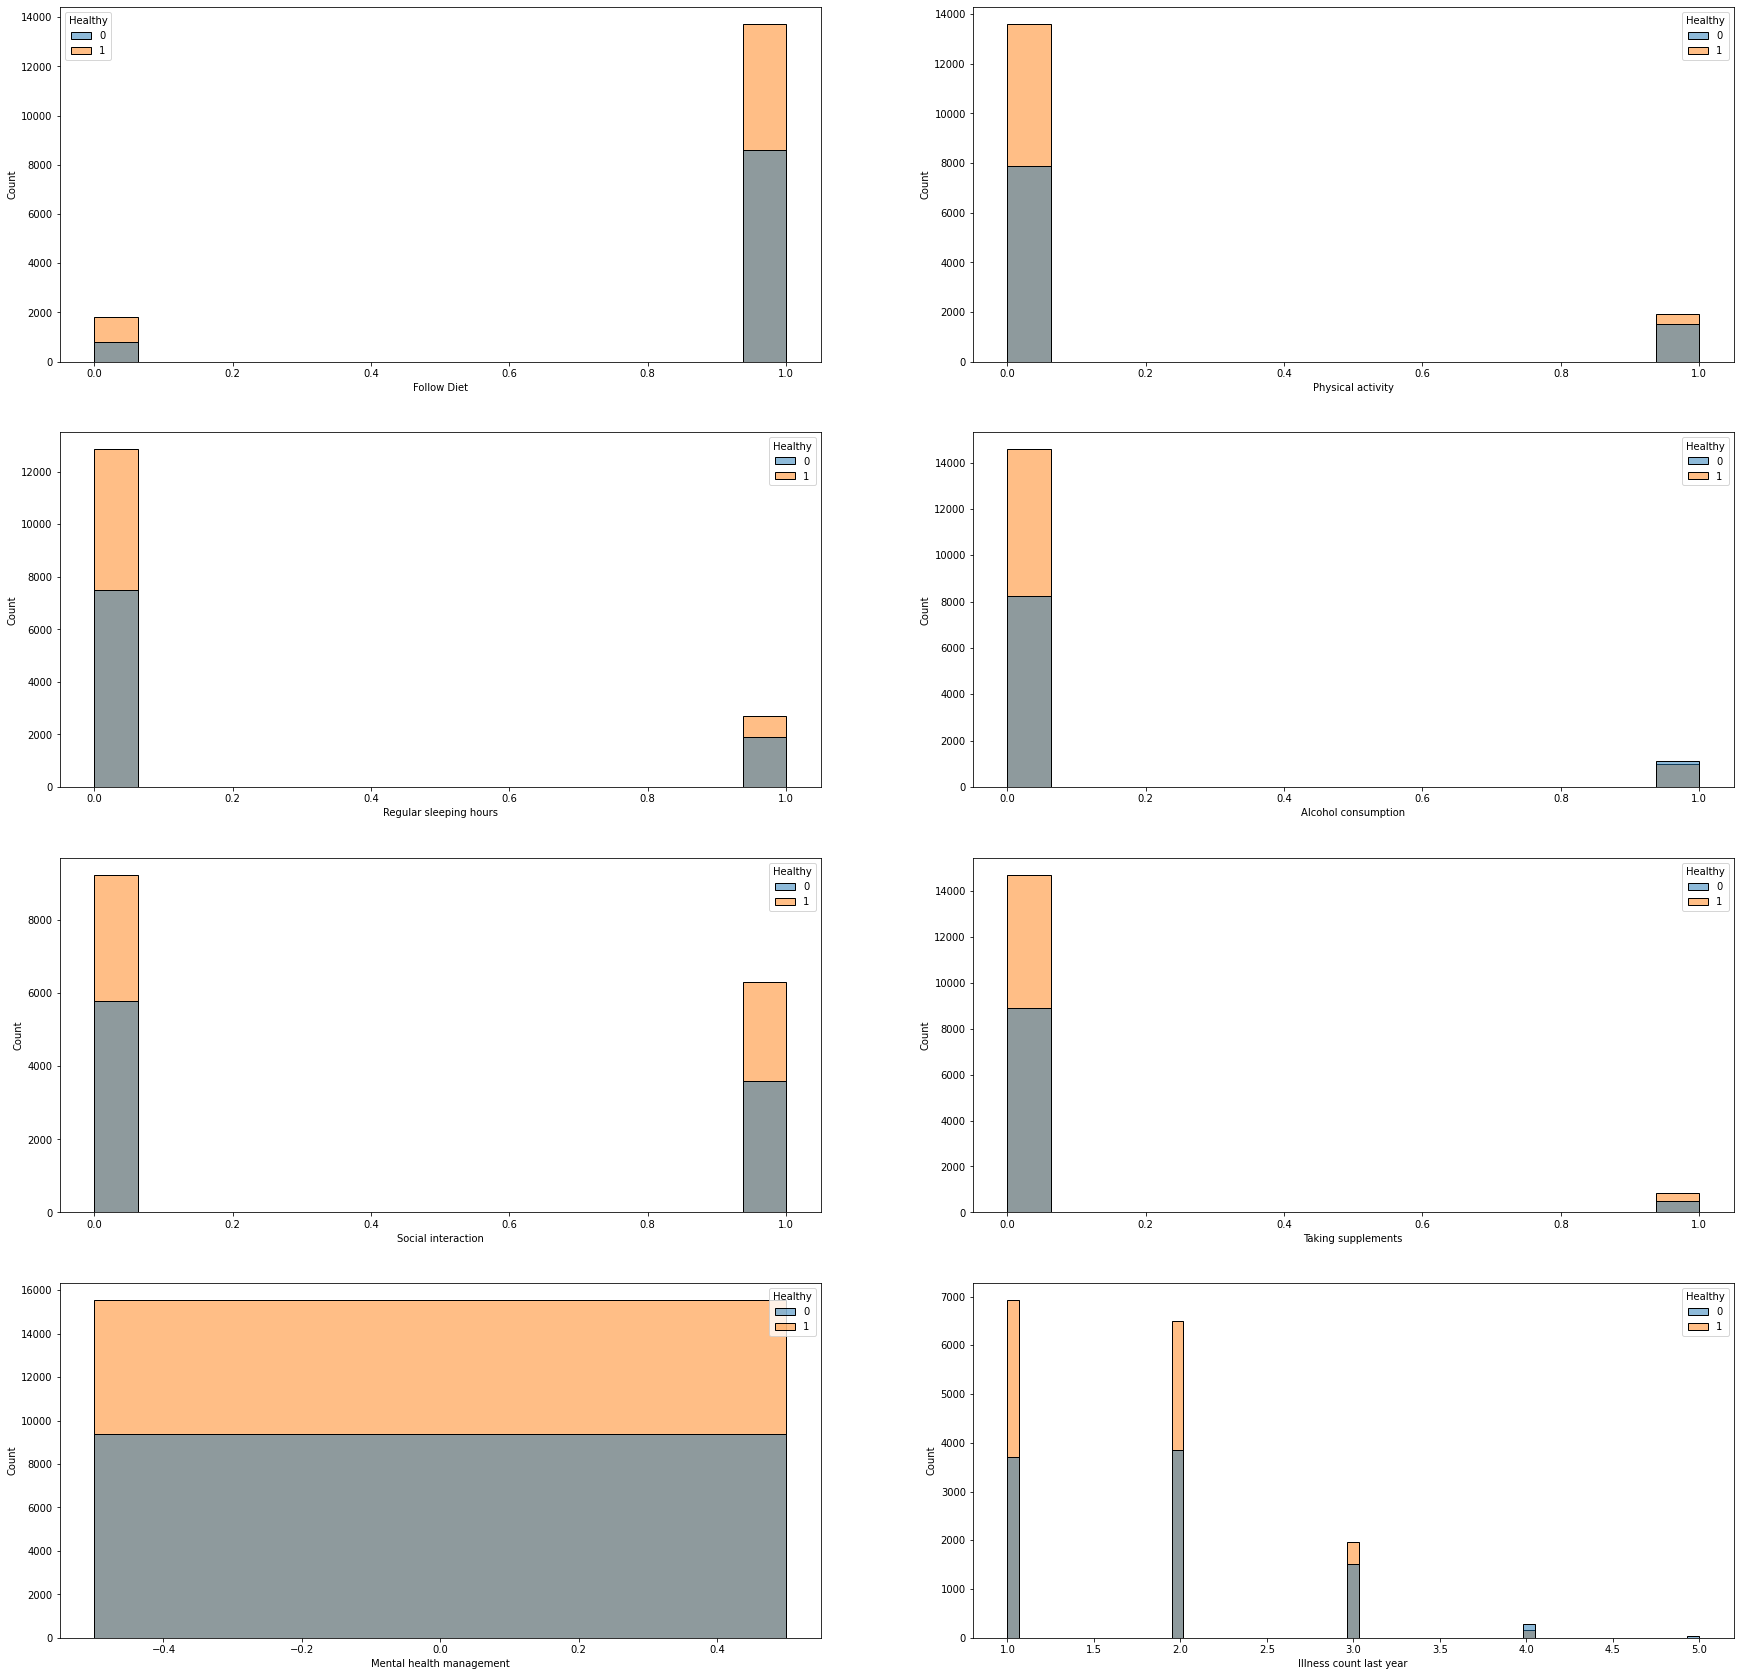

In [32]:
fig, axes = plt.subplots(4, 2, figsize=(30, 30))
count=0

li = ['Follow Diet','Physical activity',
       'Regular sleeping hours', 'Alcohol consumption', 'Social interaction',
       'Taking supplements', 'Mental health management',
       'Illness count last year']


for item in li:
    i = int(count/2)
    j = int(count%2)
    count = count + 1
    sns.histplot(data = train, x = train[item], hue = train['Healthy'], ax = axes[i,j])

#### 5.b Correlation heatmap

<AxesSubplot:>

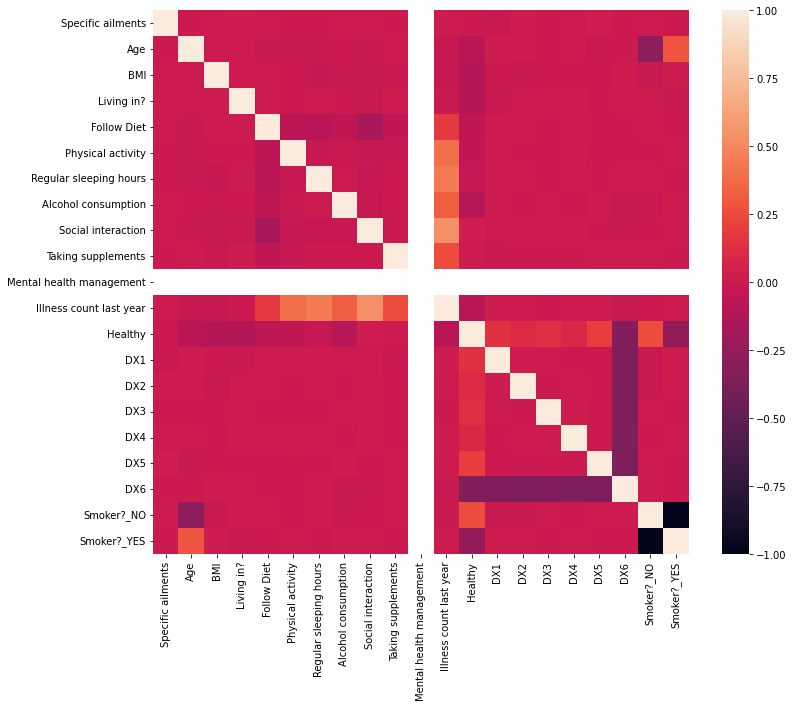

In [35]:
plt.subplots(figsize = (12,10))
sns.heatmap(train.corr())

In [38]:
train.drop('Mental health management', axis = 1, inplace = True)
test.drop('Mental health management', axis = 1, inplace = True)

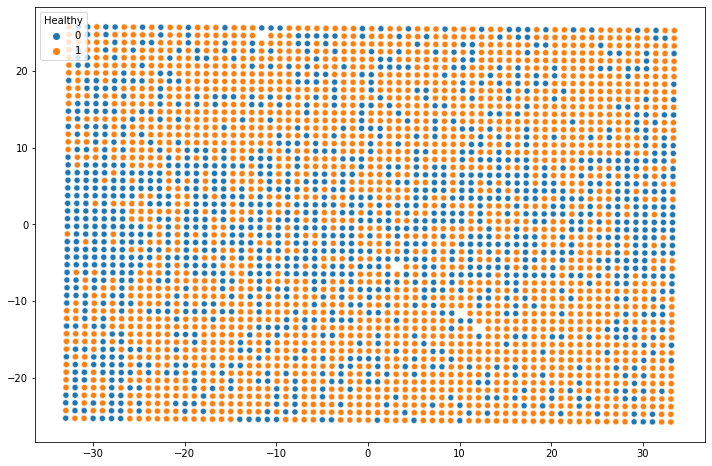

In [43]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


x_pca = train.drop(['Healthy'], axis = 1)
pca = PCA(n_components = 2, random_state = 0).fit_transform(x_pca)
plt.figure(figsize = (12, 8))
sns.scatterplot(x = pca[:, 0], y = pca[:, 1], hue = train['Healthy'])
plt.show()

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


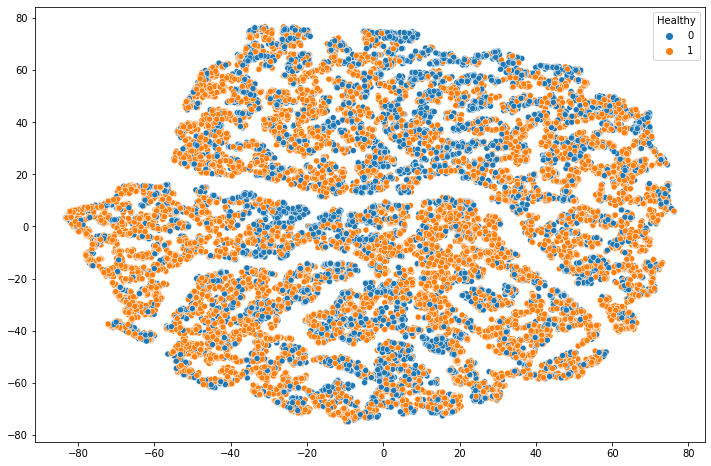

In [44]:
x_tsne = train.drop(['Healthy'], axis = 1)
tsne = TSNE(n_components = 2, random_state = 0, n_iter = 1000).fit_transform(x_tsne)
tsne

plt.figure(figsize = (12, 8))
sns.scatterplot(x = tsne[:, 0], y = tsne[:, 1], hue = train['Healthy'])
plt.show()

## 6. Model 

### 6.a. Training and testing set preparation

In [40]:
x = train.drop(['Healthy'], axis = 1)
y = train['Healthy']

In [70]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay , f1_score


from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier,StackingClassifier,VotingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB


In [48]:

# best = SelectKBest(score_func = chi2, k = 10).fit(x,y)
# best.scores_

In [50]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.1)


In [58]:
def evaluate(model,X_train,X_test,y_train,y_test,param=None):


    if param != None:
        gs = GridSearchCV(model, param, cv=5,scoring='f1').fit(X_train, y_train)
#         gs.fit(X_train,y_train)
        print("The best hyperparameters are ",gs.best_params_)
        model.set_params(**gs.best_params_)

    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)

    y_test_pred = model.predict(X_test)

    train_model_score = f1_score(y_train, y_train_pred)
    test_model_score = f1_score(y_test, y_test_pred)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    cm_test = confusion_matrix(y_test,y_test_pred)
    cm_train = confusion_matrix(y_train,y_train_pred)
    dp_train = ConfusionMatrixDisplay(cm_train)
    dp_test = ConfusionMatrixDisplay(cm_test)

    print("The test f1_score: ", test_model_score )
    print("The training f1_scoreL ", train_model_score)
    print('The training accuracy:', train_acc)
    print('The testing accuracy: ', test_acc)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

    ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,ax =axes[0])
    axes[0].set_title('For test data')

    ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,ax =axes[1])
    axes[1].set_title('For train data')



    plt.show()


The test f1_score:  0.7835365853658538
The training f1_scoreL  0.7971532627217749
The training accuracy: 0.7294924920910751
The testing accuracy:  0.7153167602245389


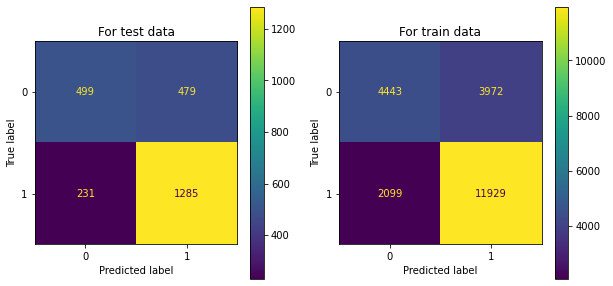

In [59]:
lreg = LogisticRegression()
evaluate(lreg,x_train, x_test, y_train, y_test)

The best hyperparameters are  {'loss': 'hinge', 'penalty': 'l2'}
The test f1_score:  0.7812403579142241
The training f1_scoreL  0.7905926749553557
The training accuracy: 0.7230762375796462
The testing accuracy:  0.7157177225340818


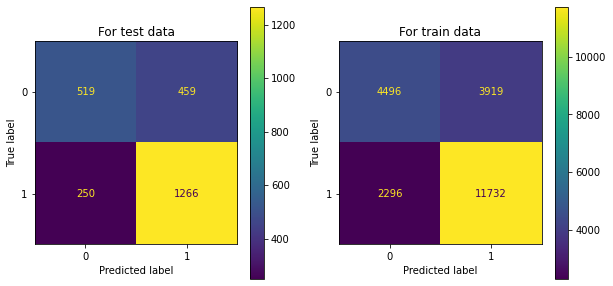

In [62]:
sgd = SGDClassifier()
param = {'loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
        'penalty':['l2', 'l1', 'elasticnet']
        }
evaluate(sgd, x_train, x_test, y_train, y_test, param)

The best hyperparameters are  {'C': 1, 'kernel': 'rbf'}
The test f1_score:  0.832325803372574
The training f1_scoreL  0.8549496352900312
The training accuracy: 0.8139286191685604
The testing accuracy:  0.7886928628708901


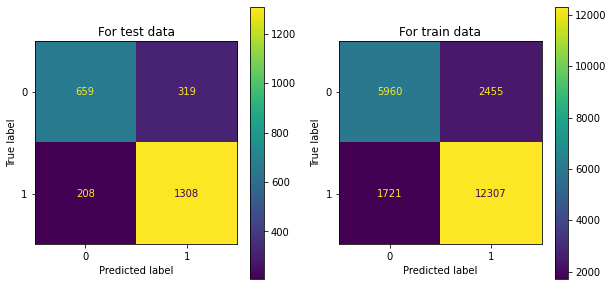

In [65]:
svc = SVC()
param = {'kernel' :['linear', 'poly', 'rbf'],
         'C': [1, 0.5, 2]
        }
evaluate(svc,x_train, x_test, y_train, y_test, param = param)

The best hyperparameters are  {'max_depth': 10, 'splitter': 'best'}
The test f1_score:  0.8537139150178398
The training f1_scoreL  0.8881523272214387
The training accuracy: 0.8586641714565789
The testing accuracy:  0.8191659983961508


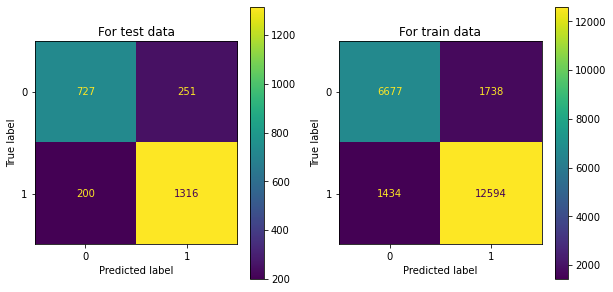

In [67]:
dt = DecisionTreeClassifier()
param = {'splitter':['best', 'random'],
         'max_depth': [ 8,9,15,10]}
evaluate(dt,x_train,x_test,y_train,y_test,param)

The best hyperparameters are  {'max_depth': 12, 'n_estimators': 500}
The test f1_score:  0.8587641866330391
The training f1_scoreL  0.9163017031630171
The training accuracy: 0.8927059662255492
The testing accuracy:  0.8203688853247795


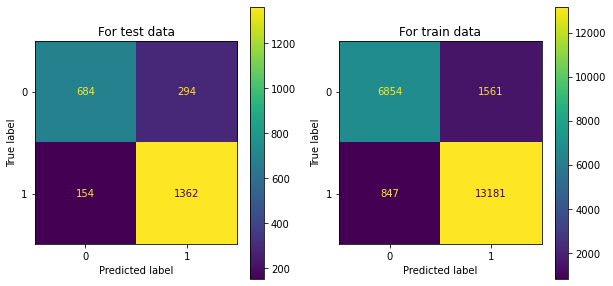

In [68]:
rf = RandomForestClassifier()
param = {'n_estimators': [100, 200, 500],
         'max_depth': [8, 12, 16]}
evaluate(rf, x_train, x_test, y_train, y_test, param = param)

The test f1_score:  0.8654781199351702
The training f1_scoreL  0.9224207817842163
The training accuracy: 0.9019293320857283
The testing accuracy:  0.8336006415396953


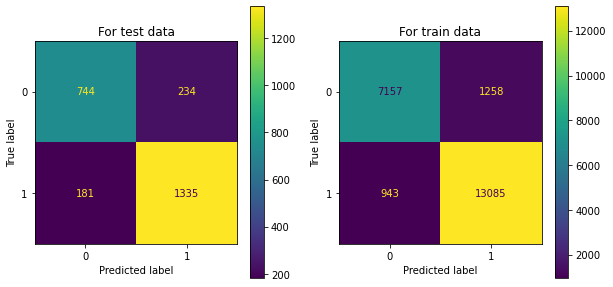

In [72]:
xg = XGBClassifier(n_estimators=80)
evaluate(xg,x_train, x_test, y_train, y_test, param = None)

The best hyperparameters are  {'loss': 'exponential', 'n_estimators': 800}
The test f1_score:  0.8678640153944837
The training f1_scoreL  0.8923076923076922
The training accuracy: 0.8633872476941585
The testing accuracy:  0.834803528468324


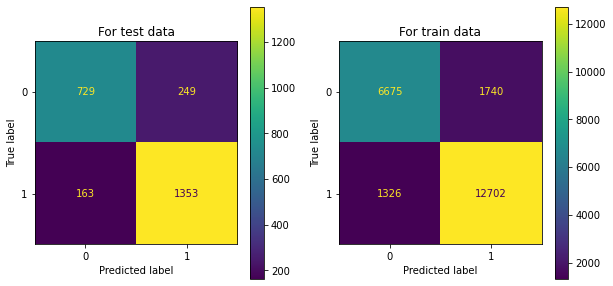

In [73]:
gb = GradientBoostingClassifier()
param = { 'n_estimators': [100,50,800],
        'loss': ['log_loss', 'exponential']}
evaluate(gb,x_train, x_test, y_train, y_test, param)

The best hyperparameters are  {'learning_rate': 1.0, 'n_estimators': 50}
The test f1_score:  0.8547979797979799
The training f1_scoreL  0.8559956071109891
The training accuracy: 0.8130374727086397
The testing accuracy:  0.8155573376102646


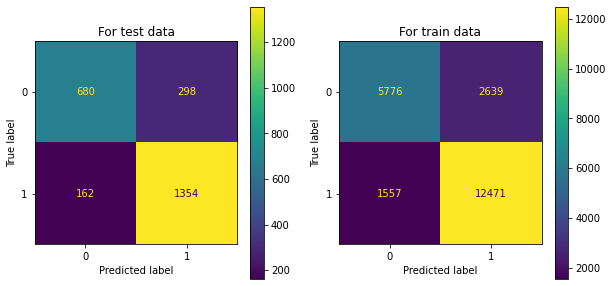

In [77]:
ada = AdaBoostClassifier()
param ={'n_estimators':[100,50, 200], 'learning_rate':[1.0, 0.5, 2.0]}
evaluate(ada,x_train, x_test, y_train, y_test, param=param)

The test f1_score:  0.8704596592735455
The training f1_scoreL  0.9043533300513398
The training accuracy: 0.8788040814507865
The testing accuracy:  0.8384121892542101


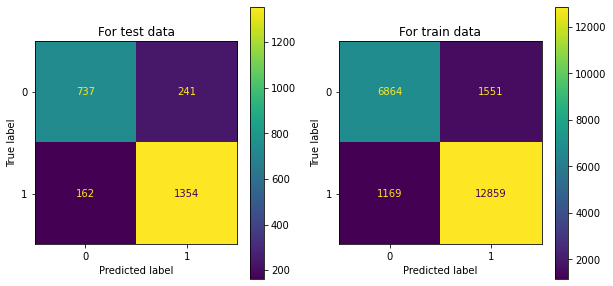

In [79]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(verbose=False,n_estimators=500)
evaluate(cat,x_train, x_test, y_train, y_test, param =None)

[LightGBM] [Info] Number of positive: 14028, number of negative: 8415
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 427
[LightGBM] [Info] Number of data points in the train set: 22443, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.625050 -> initscore=0.511040
[LightGBM] [Info] Start training from score 0.511040
The test f1_score:  0.8582625734813847
The training f1_scoreL  0.9035605145334376
The training accuracy: 0.8790714253887626
The testing accuracy:  0.8259823576583801


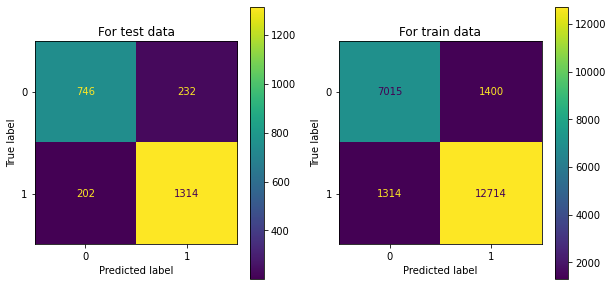

In [80]:
from lightgbm import LGBMClassifier
lg = LGBMClassifier(n_estimators=150)
evaluate(lg,x_train, x_test, y_train, y_test, param =None)

The test f1_score:  0.8653350515463919
The training f1_scoreL  0.9330938798506937
The training accuracy: 0.9153410863075346
The testing accuracy:  0.8323977546110666


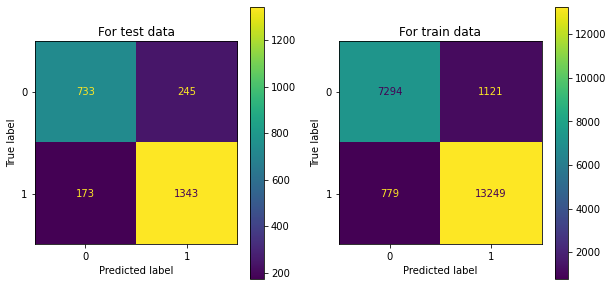

In [81]:
vc = VotingClassifier(estimators=[ ('rf', RandomForestClassifier(n_estimators=650, max_depth= 16)),
 ('xg',XGBClassifier(n_estimators=80)),('cat',CatBoostClassifier(verbose=False,n_estimators=500))], voting='soft')
evaluate(vc,x_train, x_test, y_train, y_test, param =None)

The test f1_score:  0.8674388674388673
The training f1_scoreL  0.9157846619079433
The training accuracy: 0.8932852114244976
The testing accuracy:  0.834803528468324


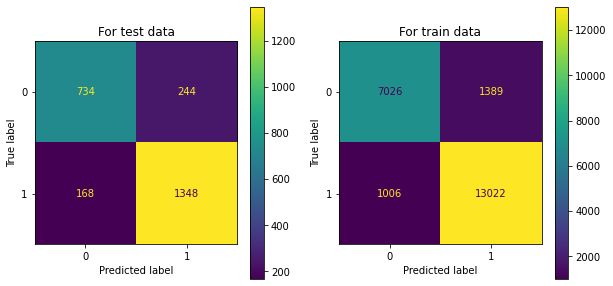

In [82]:
estimators=[ ('rf', RandomForestClassifier(n_estimators=650, max_depth= 16)),
 ('xg',XGBClassifier(n_estimators=80)),('cat',CatBoostClassifier(verbose=False,n_estimators=500))]
Stack = StackingClassifier(estimators=estimators)
evaluate(Stack,x_train, x_test, y_train, y_test, param =None)